In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
import torchvision.transforms as transforms
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
transform_train = transforms.Compose([
    transforms.Resize(224),
    transforms.RandomResizedCrop(224), 
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

transform_test = transforms.Compose([
    transforms.Resize(224),
    transforms.RandomResizedCrop(224), 
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

In [4]:
data_dir = '/content/drive/MyDrive/NSFW-FSW-Dataset-Omar-2'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['test', 'train']
['nsfw', 'sfw']


In [5]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [6]:
trainset = ImageFolder(data_dir+'/train', transform=transform_train)
testset = ImageFolder(data_dir+'/test', transform=transform_test)

In [7]:
img, label = trainset[0]
print(img.shape, label)
img

torch.Size([3, 224, 224]) 0


tensor([[[ 0.6235,  0.6314,  0.6471,  ...,  0.6549,  0.6627,  0.6706],
         [ 0.6157,  0.6235,  0.6392,  ...,  0.6627,  0.6627,  0.6706],
         [ 0.6000,  0.6078,  0.6235,  ...,  0.6706,  0.6706,  0.6706],
         ...,
         [ 0.4510,  0.4431,  0.4353,  ...,  0.3647,  0.3725,  0.3725],
         [ 0.4588,  0.4431,  0.4275,  ...,  0.3725,  0.3804,  0.3804],
         [ 0.4667,  0.4431,  0.4196,  ...,  0.3725,  0.3804,  0.3804]],

        [[ 0.0196,  0.0196,  0.0275,  ...,  0.0275,  0.0353,  0.0431],
         [ 0.0118,  0.0196,  0.0275,  ...,  0.0275,  0.0353,  0.0431],
         [-0.0039,  0.0118,  0.0275,  ...,  0.0353,  0.0431,  0.0431],
         ...,
         [-0.2078, -0.2157, -0.2235,  ..., -0.1686, -0.1608, -0.1608],
         [-0.2000, -0.2157, -0.2314,  ..., -0.1765, -0.1686, -0.1608],
         [-0.2000, -0.2157, -0.2392,  ..., -0.1765, -0.1686, -0.1608]],

        [[-0.2235, -0.2157, -0.2078,  ..., -0.2392, -0.2235, -0.2157],
         [-0.2314, -0.2157, -0.2078,  ..., -0

In [8]:
num_classes = 2

In [9]:
batch_size = 16

In [10]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

In [11]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)

print(images[1].shape)
print(labels[1].item())

torch.Size([16, 3, 224, 224])
torch.Size([3, 224, 224])
1


In [12]:
def imshow(img, title):
    npimg = img.numpy() / 2 + 0.5
    plt.figure(figsize=(batch_size, 1))
    plt.axis('off')
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.show()

In [13]:
def show_batch_images(dataloader):
    images, labels = next(iter(dataloader))
    img = torchvision.utils.make_grid(images)
    imshow(img, title=[str(x.item()) for x in labels])

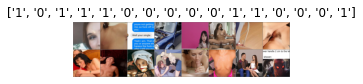

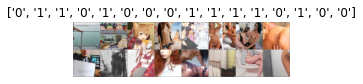

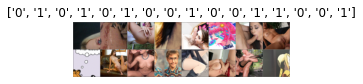

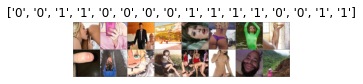

In [14]:
for i in range(4):
    show_batch_images(trainloader)

In [15]:
from torchvision import models

In [16]:
vgg = models.vgg19_bn()

In [17]:
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [18]:
print(vgg.features[0])

Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [19]:
print(vgg.classifier[6])

Linear(in_features=4096, out_features=1000, bias=True)


In [20]:
final_in_features = vgg.classifier[6].in_features
mod_classifier = list(vgg.classifier.children())[:-1]
mod_classifier.extend([nn.Linear(final_in_features, num_classes)])
print(mod_classifier)

[Linear(in_features=25088, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=2, bias=True)]


In [21]:
vgg.classifier = nn.Sequential(*mod_classifier)
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [22]:
batch_size = 16

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [23]:
def evaluation(dataloader, model):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return (100 * correct / total)

In [24]:
vgg = models.vgg19_bn(pretrained=True)

In [25]:
for param in vgg.parameters():
    param.requires_grad = False

In [26]:
final_in_features = vgg.classifier[6].in_features
vgg.classifier[6] = nn.Linear(final_in_features, num_classes)

In [27]:
for param in vgg.parameters():
    if param.requires_grad:
        print(param.shape)

torch.Size([2, 4096])
torch.Size([2])


In [28]:
vgg = vgg.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adagrad(vgg.parameters(), lr=0.05)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Iteration: 0/313, Loss: 0.75
Iteration: 50/313, Loss: 0.98
Iteration: 100/313, Loss: 0.55
Iteration: 150/313, Loss: 1.29
Iteration: 200/313, Loss: 2.02
Iteration: 250/313, Loss: 0.33
Iteration: 300/313, Loss: 0.73
Epoch: 0/10, Test acc: 61.90, Train acc: 84.36
Iteration: 0/313, Loss: 0.83
Iteration: 50/313, Loss: 0.44
Iteration: 100/313, Loss: 1.15
Iteration: 150/313, Loss: 0.69
Iteration: 200/313, Loss: 0.28
Iteration: 250/313, Loss: 1.77
Iteration: 300/313, Loss: 1.95
Epoch: 1/10, Test acc: 61.70, Train acc: 85.00
Iteration: 0/313, Loss: 1.03
Iteration: 50/313, Loss: 0.00
Iteration: 100/313, Loss: 0.32
Iteration: 150/313, Loss: 0.89
Iteration: 200/313, Loss: 0.00
Iteration: 250/313, Loss: 0.69
Iteration: 300/313, Loss: 1.26
Epoch: 2/10, Test acc: 60.40, Train acc: 85.20
Iteration: 0/313, Loss: 0.21
Iteration: 50/313, Loss: 1.76
Iteration: 100/313, Loss: 0.58
Iteration: 150/313, Loss: 0.01
Iteration: 200/313, Loss: 0.17
Iteration: 250/313, Loss: 1.48
Iteration: 300/313, Loss: 0.07
Epo

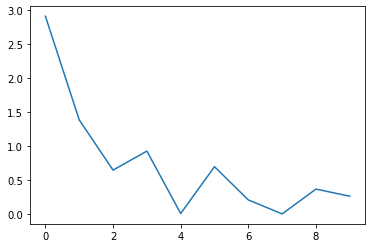

In [29]:
Iloss_epoch_arr = []
train_accuracy = []
test_accuracy = []
max_epochs = 10
loss_iterations = []

n_iters = np.ceil(5000/batch_size)

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = vgg(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        if i % 50 == 0:
            print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))
            loss_iterations.append(loss.item())
        del inputs, labels, outputs
        torch.cuda.empty_cache()
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (
        epoch, max_epochs, 
        evaluation(testloader, vgg), evaluation(trainloader, vgg)))
    train_accuracy.append(evaluation(trainloader, vgg))
    test_accuracy.append(evaluation(testloader, vgg))
    
    
plt.plot(loss_epoch_arr)
plt.show()

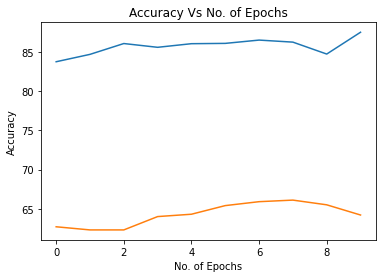

In [30]:
plt.plot(train_accuracy)
plt.plot(test_accuracy)
plt.title('Accuracy Vs No. of Epochs')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.show()

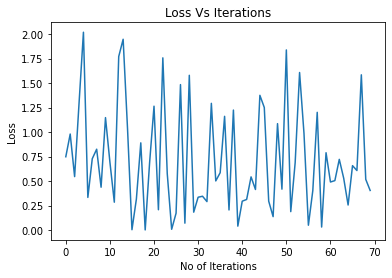

In [31]:
plt.plot(loss_iterations)
plt.title('Loss Vs Iterations')
plt.xlabel('No of Iterations')
plt.ylabel('Loss')
plt.show()